In [1]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.linalg import eig
#gridspec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import sys
sys.path.append('..')
from cann import CANN1D

/home/zilong/anaconda3/envs/hippocampalsequence/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
N = 20 #network size, i.e., number of place cells
M = 10 #truncate the number of eigenvalues, i.e., Fourier modes? 
epsilon = 1 #pertub strength, relating to the adaptation strength
offset = 10 #offset, relating to the distance between U bump and V bump

#get the connection matrix from the CANN, i.e., the generator
replay_cann = CANN1D(tau=1., tau_v=48., num=N, mbar=1.5)

weight_mat = np.zeros((N, N))
for i in range(N):
    weight_vec = replay_cann.make_conn_i(i)
    weight_mat[i,:] = weight_vec

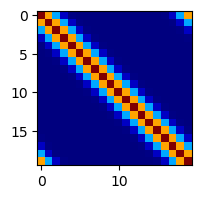

In [12]:
#plt imshow weight_mat
plt.figure(figsize=(2, 2))
plt.imshow(weight_mat, cmap='jet', aspect='auto')

In [13]:
#eigen decomposition using scipy
eigenvalues, eigenvectors = eig(weight_mat)

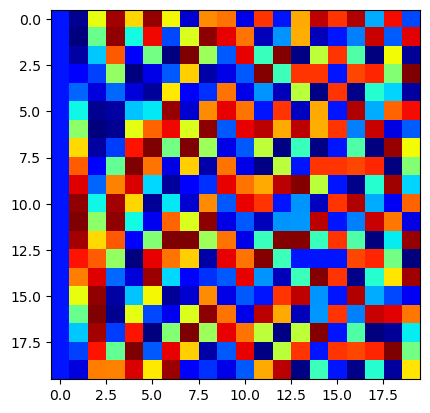

In [16]:
plt.imshow(eigenvectors, cmap='jet')

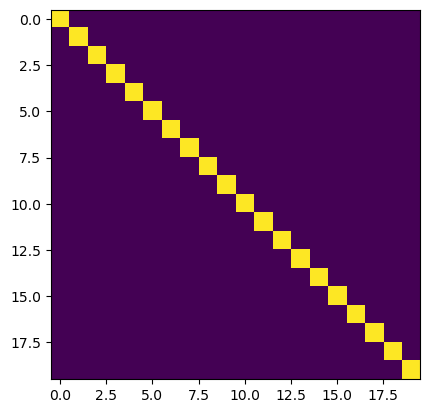

In [25]:
plt.imshow(np.dot(eigenvectors.T,eigenvectors))

eigenvectors.shape